# Understanding Descriptive Statistics

Import the necessary libraries here:

In [418]:
# Libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [419]:
# your code here

dice = [1, 2, 3, 4, 5, 6]
result = random.choices(dice, k=10)
rolling = pd.DataFrame(result)
rolling = rolling.reset_index()
result = rolling.rename(columns={'index':'num_times', 0:'number'})
#df.rename(columns = {'old_col1':'new_col1', 'old_col2':'new_col2'}

In [434]:
result

,num_times,number
0,0,1
1,1,4
2,2,6
3,3,6
4,4,3
5,5,5
6,6,1
7,7,4
8,8,1
9,9,2


#### 2.- Plot the results sorted by value.

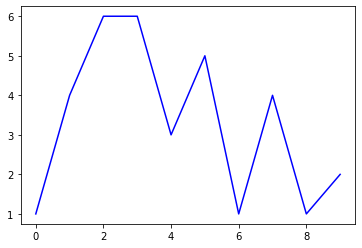

In [435]:
# your code here
plt.plot(result["number"], color='blue')

plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

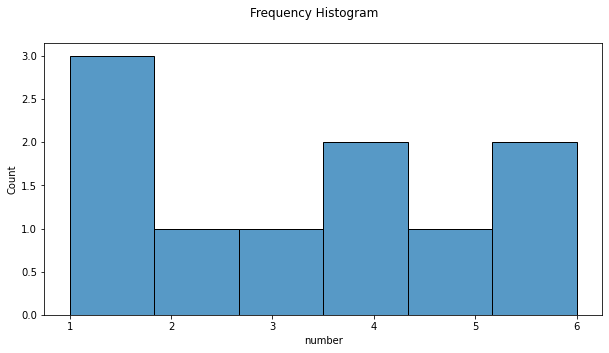

In [436]:
# your code here

fig, ax = plt.subplots(ncols=1,
                       nrows=1,
                       figsize=(10, 5))

fig.suptitle('Frequency Histogram') 
sns.histplot(data=result, 
             x='number',
             bins=6)

plt.show()
#plt.hist(result, bins=5)
#plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

In [437]:
"""
The frequency of the data results is concentrated between 1, 3, 4 and 6 numbers.
The maximum times we get a number is 2, (trying 10 times).
"""

'\nThe frequency of the data results is concentrated between 1, 3, 4 and 6 numbers.\nThe maximum times we get a number is 2, (trying 10 times).\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [438]:
# your code here
def result_mean(l):
    mean = l.sum()/len(l)
    return mean

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [439]:
# your code here
result_mean(result["number"])
#result["number"].mean()

3.3

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [440]:
def m_funct(l):
    sorted_l = sorted(l)
    l_len = len(sorted_l)
    middle = (l_len - 1) // 2
    if middle % 2:
        return sorted_l[middle]#impar
    else:
        return (sorted_l[middle] + sorted_l[middle + 1]) / 2#si es par

In [441]:
m_funct(result["number"])


3.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [493]:
# your code here
def calc_quant(l):
    sorted_l = sorted(l)
    n = int(len(sorted_l)//2)
    q2 = m_funct(sorted_l)
    q1 = m_funct(sorted_l[:n])-0.25
    q3 = m_funct(sorted_l[n+1:])-0.25
    return q1, q2, q3
    

In [494]:
calc_quant(result["number"])

(1.25, 3.5, 4.75)

In [444]:
result["number"].describe()

count    10.000000
mean      3.300000
std       2.002776
min       1.000000
25%       1.250000
50%       3.500000
75%       4.750000
max       6.000000
Name: number, dtype: float64

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [236]:
# your code here
data = pd.read_csv("../data/roll_the_dice_hundred.csv")
data_sort = data["value"].sort_values()
data_sort.head()

0     1
47    1
56    1
9     1
73    1
Name: value, dtype: int64

In [237]:
print("max:", data_sort.max())
print("max:", data_sort.min())

max: 6
max: 1


In [238]:
#data["value"].value_counts()

In [ ]:
"""
The max number value is 6, the minimum is 1, we have a len of 100.
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [276]:
# your code here
result_mean(data_sort)
#data_mean = data["value"].sum()/100
#data_mean

3.74

In [416]:
m_funct(data_sort) #median

4

In [482]:
def calc_quant_1(l):
    sorted_l = sorted(l)
    q2 = m_funct(sorted_l)
    n = int(len(sorted_l) // 2)
    q1 = m_funct(sorted_l[:n])
    q3 = m_funct(sorted_l[n+1:])
    
    return q1, q2, q3

In [496]:
calc_quant_1(data_sort)

(2.0, 4, 5.0)

In [484]:
data_sort.describe()

count    100.000000
mean       3.740000
std        1.703354
min        1.000000
25%        2.000000
50%        4.000000
75%        5.000000
max        6.000000
Name: value, dtype: float64

#### 3.- Now, calculate the frequency distribution.


In [242]:
# your code here
data_sort.value_counts()

6    23
4    22
2    17
3    14
1    12
5    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

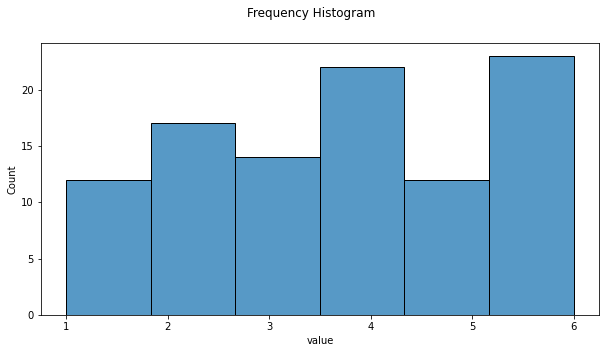

In [281]:
# your code here

fig, ax = plt.subplots(ncols=1,
                       nrows=1,
                       figsize=(10, 5))

fig.suptitle('Frequency Histogram') 
sns.histplot(data=data,
             x='value',
             bins=6)

plt.show()



#data_freq = data["value"].value_counts().sort_values()

#plt.hist(data_freq, bins=10)
#plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

In [ ]:
"""
The most repeted number is 6 and the less one is 1 and 5. The mean es 3.74 adn de median 4
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [498]:
# your code here
data_2 = pd.read_csv("../data/roll_the_dice_thousand.csv")
data_2

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5
...,...,...,...
995,995,995,1
996,996,996,4
997,997,997,4
998,998,998,3


In [499]:
data_sort_2 = data_2["value"].sort_values()
data_sort_2.head()

564    1
922    1
560    1
213    1
214    1
Name: value, dtype: int64

In [500]:
print("max:", data_sort_2.max())
print("max:", data_sort_2.min())

max: 6
max: 1


In [501]:
data_mean_2 = data_2["value"].sum()/1000
data_mean_2

3.447

In [504]:
data_freq_2 = data_2["value"].value_counts()
data_freq_mean_2 = data_freq_2/6
data_freq_mean_2

1    29.166667
3    29.166667
4    28.000000
2    27.833333
6    27.666667
5    24.833333
Name: value, dtype: float64

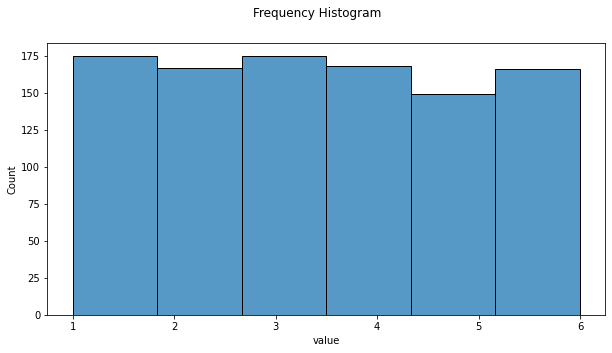

In [502]:
data_freq_2 = data_2["value"].value_counts()
data_freq_mean_2 = data_freq_2/6

fig, ax = plt.subplots(ncols=1,
                       nrows=1,
                       figsize=(10, 5))

fig.suptitle('Frequency Histogram') 
sns.histplot(data=data_2,
             x='value',
             bins=6)

plt.show()

#plt.hist(data_freq_mean_2, bins=10)
#plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

In [ ]:
"""
The frequency is similar with all numbers when the sample is bigger.
So, the more you sample, the more equal is the frequency.
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [506]:
# your code here
data_ages = pd.read_csv("../data/ages_population.csv")
data_ages

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


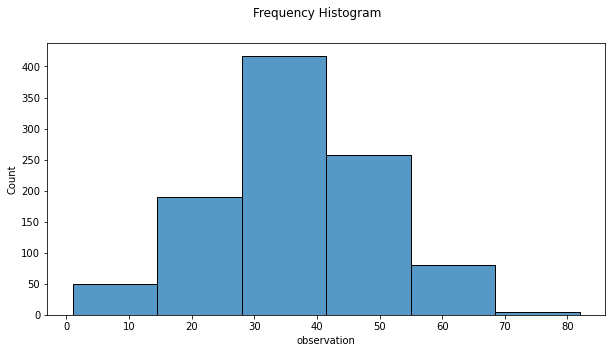

In [509]:
fig, ax = plt.subplots(ncols=1,
                       nrows=1,
                       figsize=(10, 5))

fig.suptitle('Frequency Histogram') 
sns.histplot(data=data_ages,
             x='observation',
             bins=6)

plt.show()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [510]:
# your code here
print("mean:", data_ages["observation"].mean())
print("standar deviation:", data_ages["observation"].std())

mean: 36.56
standar deviation: 12.816499625976762


In [ ]:
"""
The mean is 36.56 years. Yes because the data is concentrated arround 28 and 40.
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [512]:
# your code here
data_ages_pop = pd.read_csv("../data/ages_population2.csv")
data_ages_pop

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

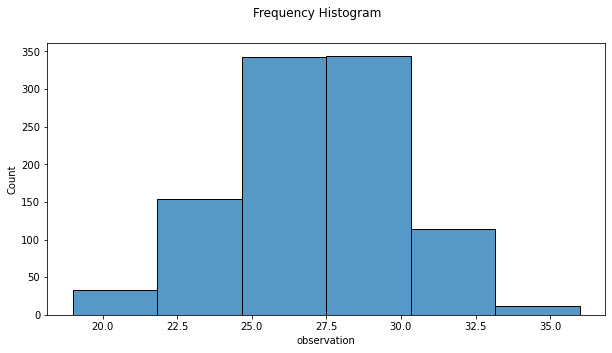

In [513]:
fig, ax = plt.subplots(ncols=1,
                       nrows=1,
                       figsize=(10, 5))

fig.suptitle('Frequency Histogram') 
sns.histplot(data=data_ages_pop,
             x='observation',
             bins=6)

plt.show()

In [ ]:
"""
Yes, the distribution is concentrated in less range of age.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [172]:
# your code here
print("mean:", data_ages_pop["observation"].mean())
print("standar deviation:", data_ages_pop["observation"].std())

mean: 27.155
standar deviation: 2.969813932689186


In [ ]:
"""
The standar deviation in step1 is hight than the step 2.
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [514]:
# your code here
data_ages_3 = pd.read_csv("../data/ages_population3.csv")
data_ages_3

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


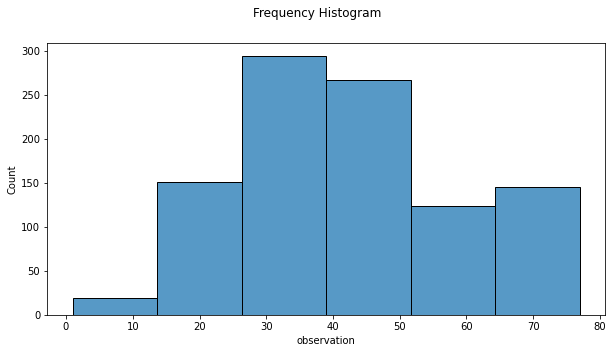

In [522]:
fig, ax = plt.subplots(ncols=1,
                       nrows=1,
                       figsize=(10, 5))

fig.suptitle('Frequency Histogram') 
sns.histplot(data=data_ages_3,
             x='observation',
             bins=6)

plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [515]:
# your code here
print("mean:", data_ages_3["observation"].mean())
print("standar deviation:", data_ages_3["observation"].std())

mean: 41.989
standar deviation: 16.144705959865934


In [ ]:
"""
In this case de standard deviation is higher in step 3 than step 1.
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

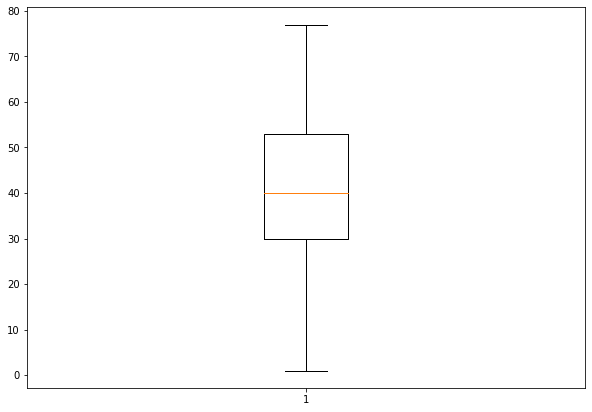

In [516]:
# your code here
fig = plt.figure(figsize =(10, 7))
plt.boxplot(data_ages_3)
plt.show()

In [517]:
percentages = [0.25, 0.5, 0.75, 0.95]
percentiles = data_ages_3["observation"].quantile(percentages)
df = pd.DataFrame(percentiles)
df.index = [f'{p * 100}%' for p in percentages]
df.transpose()

,25.0%,50.0%,75.0%,95.0%
observation,30.0,40.0,53.0,70.0


In [518]:
diff = data_ages_3["observation"].median() - data_ages_3["observation"].mean()
print("Differences between median and mean:", diff)

Differences between median and mean: -1.9889999999999972


In [ ]:
"""
Differences between median and mean: -1.9889999999999972
The median is concentrated on 50%.
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [519]:
# your code here
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
percentiles = data_ages_3["observation"].quantile(percentages)
df = pd.DataFrame(percentiles)
df.index = [f'{p * 100}%' for p in percentages]
df.transpose()

,5.0%,25.0%,50.0%,75.0%,95.0%
observation,17.0,30.0,40.0,53.0,70.0


In [521]:
"""
It's still concentrated in 40
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""